In [3]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE

df = pd.read_csv('../data/winequality-white.csv', sep=";") 

features =  list(df.columns)
features.remove("quality")

pd.value_counts(df['quality'],normalize=True).sort_index().plot.bar()
plt.ylabel('proportion of points')
plt.xlabel('quality')
plt.title('Before preprocessing')
plt.xticks(rotation=0, ha='right')
plt.savefig('../figures/imbalanced_dataset.png',dpi=300)
plt.show()

<Figure size 640x480 with 1 Axes>

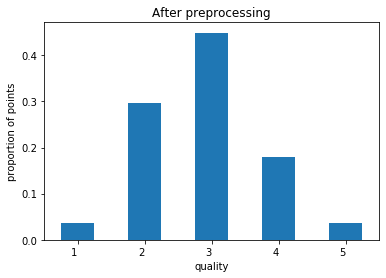

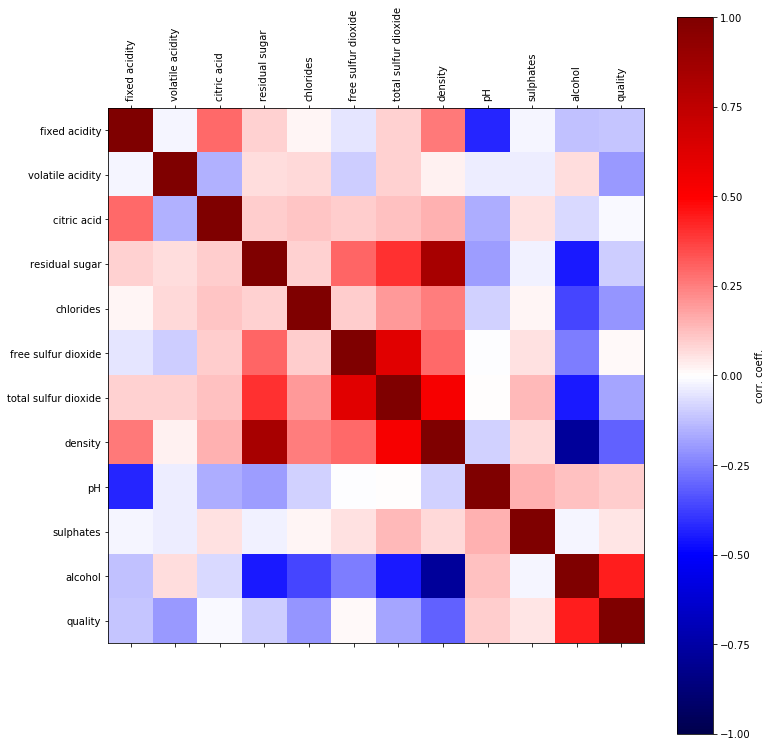

3    2198
2    1457
4     880
1     183
5     180
Name: quality, dtype: int64

In [5]:


label = 'quality'

df = pd.read_csv('../data/preprocessed.csv') 
df.head()

features =  list(df.columns)
features.remove("quality")

pd.value_counts(df['quality'],normalize=True).sort_index().plot.bar()
plt.ylabel('proportion of points')
plt.xlabel('quality')
plt.title('After preprocessing')
plt.xticks(rotation=0, ha='right')
plt.savefig('../figures/balanced_dataset.png',dpi=300)
plt.show()


plt.figure(figsize=(11,11))
plt.matshow(df.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df.corr().shape[0]),list(df.corr().columns),rotation=90)
plt.yticks(np.arange(df.corr().shape[0]),list(df.corr().columns))
ax = plt.gca()
ax.set_ylim(11.5, -0.5)
plt.tight_layout()
plt.savefig('../figures/corr_coeff.png',dpi=300)
plt.show()

df['quality'].value_counts()

In [2]:
corrmat = df.corr()
all_cols = corrmat.sort_values('quality',ascending=True)['quality']

print(all_cols)


density                -0.309747
chlorides              -0.210518
volatile acidity       -0.195547
total sulfur dioxide   -0.173394
fixed acidity          -0.112149
residual sugar         -0.098631
citric acid            -0.009790
free sulfur dioxide     0.013386
sulphates               0.054161
pH                      0.100084
alcohol                 0.440394
quality                 1.000000
Name: quality, dtype: float64


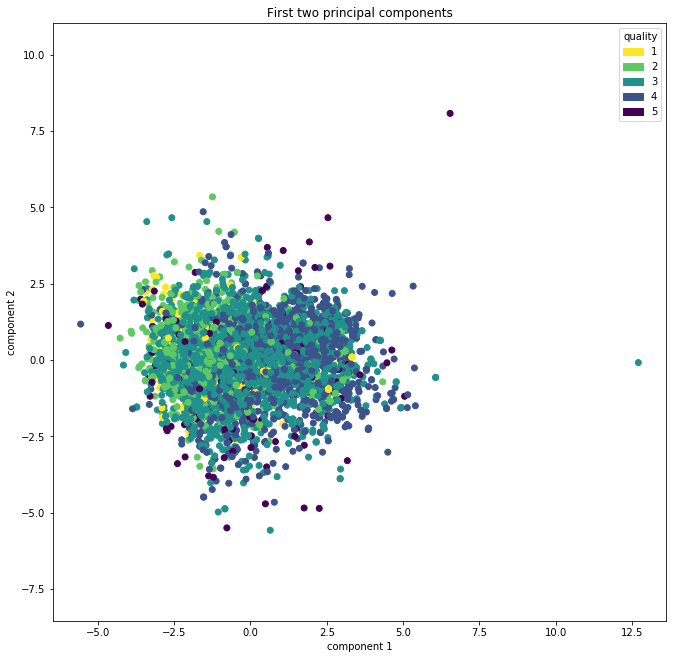

In [148]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

 
X = df.drop(['quality'], axis=1).values

# dimensionality reduction
pca_2 = PCA(n_components=2)
X_reduced = pca_2.fit_transform(X)

y = df['quality'].values
plt.figure(figsize=(11,11))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.axis('equal')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("First two principal components")

# adding legend
legend_dict = {'1' : '#FDE624', '2': '#5EC962',  '3': '#22918C', '4' : '#3B528B', '5': '#440154'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList, title="quality")
###############

plt.savefig('../figures/PCA_2.png',dpi=300)
plt.show()


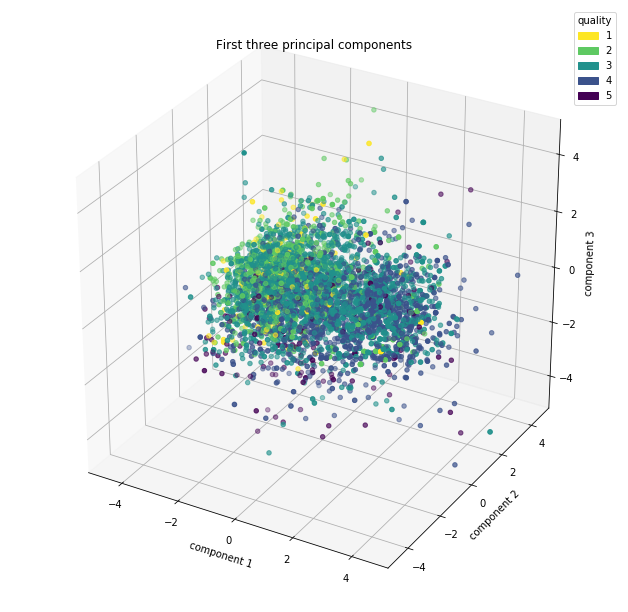

In [149]:
#PCA 3 components

X = df.drop(['quality'], axis=1).values

# dimensionality reduction
pca_2 = PCA(n_components=3)
X = pca_2.fit_transform(X)

y = df['quality'].values
plt.figure(figsize=(11,11))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y);

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

ax.set_zlabel('component 3')
plt.xlabel("component 1")
plt.ylabel("component 2")

plt.title("First three principal components")

# adding legend
legend_dict = {'1' : '#FDE624', '2': '#5EC962',  '3': '#22918C', '4' : '#3B528B', '5': '#440154'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList, title="quality")
###############

plt.savefig('../figures/PCA_3.png',dpi=300)
plt.show()

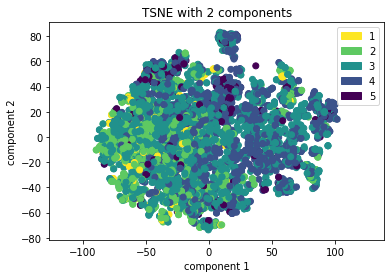

In [151]:
#TSE components = 2

X = df.drop(['quality'], axis=1).values
X_embedded = TSNE(n_components=2).fit_transform(X)
y = df['quality'].values
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.axis('equal')

plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("TSNE with 2 components")

# adding legend
legend_dict = {'1' : '#FDE624', '2': '#5EC962',  '3': '#22918C', '4' : '#3B528B', '5': '#440154'}
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList)
###############

plt.savefig('../figures/TSNE_2.png',dpi=300)
plt.show()

In [ ]:

X = df.drop(['quality'], axis=1).values
X_embedded = TSNE(n_components=3).fit_transform(X)
y = df['quality'].values

plt.figure(figsize=(11,11))
ax = plt.axes(projection='3d')
ax.scatter3D(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y);
ax.set_zlabel('component 3')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("TSNE with 3 components")
plt.savefig('../figures/TSNE_3.png',dpi=300)

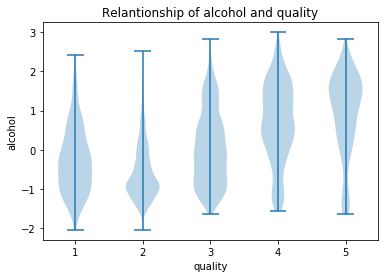

In [7]:
def get_violin_plot(feature, save=False):
    dataset = [
        df[df['quality']== 1][feature].values,
        df[df['quality']== 2][feature].values,
        df[df['quality']== 3][feature].values,
        df[df['quality']== 4][feature].values,
        df[df['quality']== 5][feature].values,
    ]
    plt.violinplot(dataset = dataset)
    plt.title("Relantionship of alcohol and quality")
    plt.xticks([1,2, 3, 4, 5],['1','2', '3', '4', '5'])
    plt.ylabel(feature)
    plt.xlabel("quality")
    if save:
        plt.savefig(f"../figures/{feature}_violin.png",dpi=300)
    plt.show()
    
get_violin_plot("alcohol", save=True)

In [ ]:
for feature in features:
    get_violin_plot(feature)

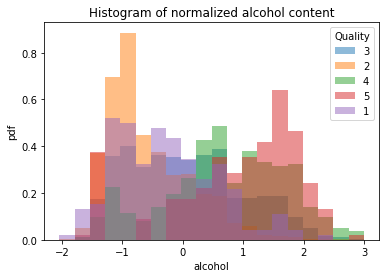

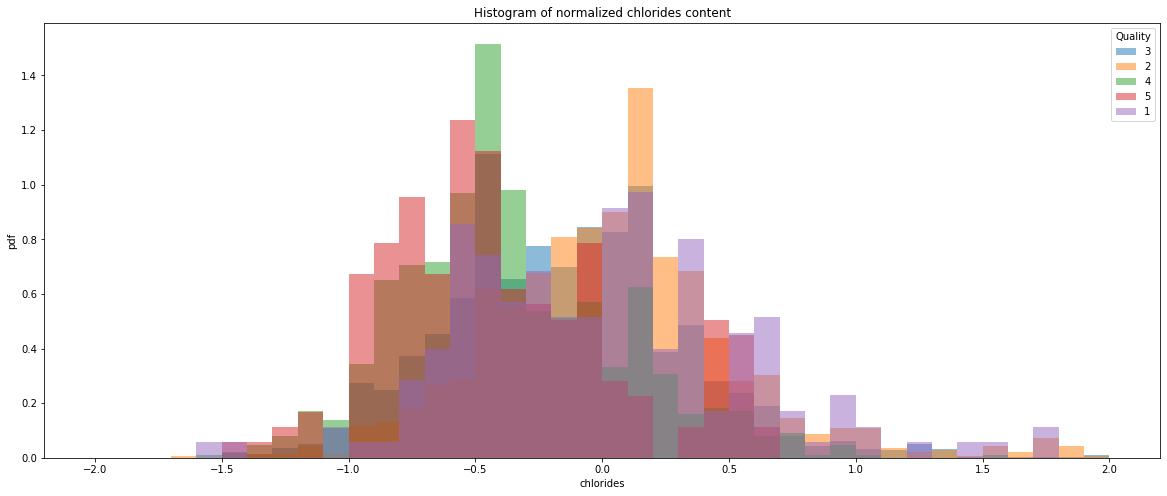

In [24]:
def get_histogram(feature, save=True):
    categories = df['quality'].unique()
    bin_range = (df[feature].min(),df[feature].max())

    for c in categories:
        plt.hist(df[df[label]==c][feature],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    
    
    plt.ylabel('pdf')
    plt.xlabel(feature)
    plt.title(f"Histogram of normalized {feature} content")
    
    plt.legend(title="Quality")
    
    if save:
        plt.savefig(f"../figures/{feature}_histogram.png",dpi=300)
    
    plt.show()

get_histogram("alcohol", save=True)

def get_custom_histogram(feature, save=False):
    plt.figure(figsize=(20,8))
    categories = df['quality'].unique()
    bin_range = (df[feature].min(),df[feature].max())

    for c in categories:
        plt.hist(df[df[label]==c][feature],alpha=0.5,label=c,range=[-2,2],bins=40,density=True)
    
    plt.legend(title="Quality")
    
    plt.ylabel('pdf')
    plt.xlabel(feature)
    plt.title(f"Histogram of normalized {feature} content")
    

    
    if save:
        plt.savefig(f"../figures/{feature}_custom_histogram.png",dpi=300)
    plt.show()
    
get_custom_histogram('chlorides', save=True)

In [ ]:
for feature in features:
    get_histogram(feature)

In [ ]:
def get_scatter_plot(df, feature_1, feature_2):
    y = df['quality'].values
    X = df[[feature_1, feature_2]].values
    
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, label=[1, 2])
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.legend()
    plt.axis('equal')
    plt.title(f"Relantionship between {feature_1} and {feature_2}")
    plt.tight_layout()


    # adding legend
    legend_dict = {'1' : '#FDE624', '2': '#5EC962',  '3': '#22918C', '4' : '#3B528B', '5': '#440154'}
    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color=legend_dict[key], label=key)
            patchList.append(data_key)

    plt.legend(handles=patchList, title="quality")
    ###############
    
    plt.savefig(f"../figures/scatter_plots/{feature_1.strip()}_{feature_2.strip()}.png",dpi=300)
    plt.show()


def get_all_scatter_plots(features):
    for i in range(len(features)):
        for j in range(i, len(features)):
            if i == j:
                continue
            feature_1 = features[i]
            feature_2 = features[j]
            get_scatter_plot(df, feature_1, feature_2)

get_all_scatter_plots(features)

In [168]:
# Data for three-dimensional scattered points
from mpl_toolkits import mplot3d

def get_3d_scatter_plot(df, f1, f2, f3, save=False):
    X = df[[f1, f2, f3]].values
    y = df['quality'].values

    plt.figure(figsize=(11,11))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y);
    plt.title(f"Relantionship of {f1}, {f2} and {f3}")
    
    ax.set_zlabel(f3)
    plt.xlabel(f1)
    plt.ylabel(f2)
    
    if save:
        plt.savefig(f"../figures/{f1}_{f2}_{f3}.png",dpi=300)

def get_all_scatter_plots(features):
    for i in range(len(features)):
        for j in range(i, len(features)):
            if i == j:
                continue
            feature_2 = features[i]
            feature_3 = features[j]
            get_3d_scatter_plot(df, 'alcohol', feature_2, feature_3)


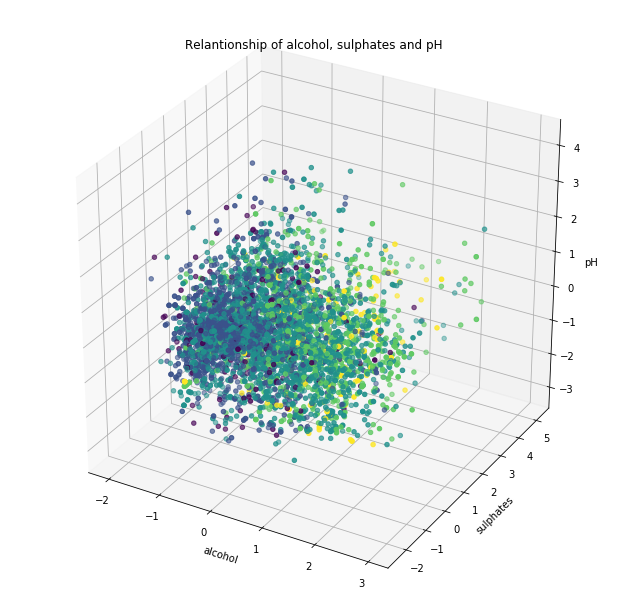

In [171]:
get_3d_scatter_plot(df, 'alcohol', 'sulphates', 'pH', save=True)